In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
df=pd.read_csv('/Users/vedang/Downloads/train 2.csv')

preprocessing the data

In [3]:
df=np.array(df)

Shuffling introduces randomness that prevents biased learning, basically prevents overfitting,if you train in batches,it can get biased to each class

In [4]:
m,n=df.shape
np.random.shuffle(df)
print(m,n)

42000 785


m= no of total images \n
n = no of features (all individual pixel data) + 1 (label)

now we will train on the remaining data

In [5]:
df_train = df.T
df_train.shape

(785, 42000)

In [6]:
Y_train=df_train[0]
X_train=df_train[1:]
X_train=X_train/255.

In [7]:
X_train.shape

(784, 42000)

Y_val/Y_train containss all the label info
X_val/X_train contains all the pixel data

the data is now loaded,now we define the initilizing parameters

In [8]:
def initialize_parameters():
     W1=np.random.rand(10,784) - 0.5
     b1=np.random.rand(10,1) - 0.5
     W2=np.random.rand(10,10) - 0.5
     b2=np.random.rand(10,1) - 0.5
     return W1,b1,W2,b2

In [9]:
# W1=np.random.rand(10,784) - 0.5
# W1.shape

w1=weight for first hidden layer,10 neurons,subtracting 0.5 so that the data is now centered at origin,this helps in avoiding a scenario when everything is 0(both w and b = 0),and all the neurons basically start learning the exact same things by picking up the exact same changes

w2=weight for the output layer connected to previous layer,the size is (current no of neurons,previous layer no of neurons)

In [10]:
def ReLu(Z):
    return np.maximum(0,Z)

In [11]:
def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)


now defining forward propagation algo

In [12]:
def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X) + b1
    A1=ReLu(Z1)
    Z2=W2.dot(A1) + b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2


In [13]:
def derivative_ReLu(Z):
    return Z > 0

we need to one hot encode our labels,we do this because it can create an error while computing the loss fucntion,we do this by basically making the correct label value as 1 and remaining else as 0,then we make a matrix of this,eg for label 2 , we make [0,0,1,0,0....,]  

In [14]:
def one_hot_encode(Y):
    arr=np.zeros((Y.size,Y.max()+1))
    arr[np.arange(Y.size),Y]=1
    arr=arr.T
    return arr



In [15]:
def back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot_encode(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLu(Z1)  
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    
    log_probs = np.log(A2 + 1e-9)  
    loss = -np.sum(one_hot_Y * log_probs) / m
    
    return dW1, db1, dW2, db2 , loss


In [16]:
def update_para(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2

    

In [17]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)


def get_accuracy(predictions, Y):
    print(predictions, Y)
    accuracy=np.sum(predictions == Y) / Y.size
    return accuracy



# Batch gradient descent

In [18]:


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initialize_parameters()
    accuracy_list = []  
    iteration_list = []
    loss_list = []
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 ,l= back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_para(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
            accuracy_list.append(get_accuracy(predictions, Y))
            iteration_list.append(i)
            loss_list.append(l)
    # used gpt for graphs       
    plt.figure(figsize=(10, 6))
    plt.plot(iteration_list, accuracy_list, label='Accuracy', color='royalblue', marker='o', linestyle='-')
    plt.plot(iteration_list, loss_list, label='Loss', color='crimson', marker='x', linestyle='--')
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.title('Training Accuracy & Loss Over Time', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    return W1, b1, W2, b2


In [20]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 0 2 ... 6 6 8] [4 7 5 ... 8 9 6]
0.10633333333333334
[6 0 2 ... 6 6 8] [4 7 5 ... 8 9 6]


KeyboardInterrupt: 

In [21]:
42000/128

328.125

# SGD
## we take every example individually here

In [ ]:
def one_hot_encode(Y, num_classes=10):

    y_size = Y.size
    y_values = Y 

    arr = np.zeros((y_size, num_classes))
    arr[np.arange(y_size), y_values] = 1
    arr = arr.T # Transpose to make it (num_classes, y_size)
    return arr

In [ ]:
def get_accuracy(predictions, Y):
    accuracy = np.sum(predictions == Y) / Y.size
    return accuracy

In [ ]:
def back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    num_classes = 10 
    m = Y.size
    
    one_hot_Y = one_hot_encode(Y, num_classes) 
    
    dZ2 = A2 - one_hot_Y
    
    dW2 = (1/m) * dZ2.dot(A1.T) 
    db2 = (1/m) * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * derivative_ReLu(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1) 
    
    log_probs = np.log(A2 + 1e-9)
    loss = -np.sum(one_hot_Y * log_probs) / m # Cross-entropy loss
    
    return dW1, db1, dW2, db2, loss

In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initialize_parameters()
    accuracy_list = []  
    iteration_list = []
    loss_list = []
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2, l = back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y) 
        W1, b1, W2, b2 = update_para(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(predictions, Y) 
            acc = get_accuracy(predictions, Y) 
            print(acc) 
            
            accuracy_list.append(acc)
            iteration_list.append(i)
            loss_list.append(l)
            
    
    plt.figure(figsize=(10, 6))
    plt.plot(iteration_list, accuracy_list, label='Accuracy', color='royalblue', marker='o', linestyle='-')
    plt.plot(iteration_list, loss_list, label='Loss', color='crimson', marker='x', linestyle='--')
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.title('Batch Gradient Descent: Training Accuracy & Loss Over Time', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    return W1, b1, W2, b2

In [ ]:
def sgd(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initialize_parameters()
    
   
    accuracy_plot_list, iteration_plot_list, loss_plot_list = [], [], []
    
    # For storing values over a window (say,500 iterations)
    temp_accuracy_list = []
    temp_loss_list = []
    
    m_total = X.shape[1]  # Total no. of training examples

    for i in range(iterations):
        # Pick a random example
        idx = np.random.randint(0, m_total)
        x_sample = X[:, idx:idx+1]       # Shape: (num_features, 1), e.g., (784, 1)
        y_sample = np.array([Y[idx]])    # Shape: (1,), e.g., np.array([5])

        
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, x_sample)
        dW1, db1, dW2, db2, current_loss = back_propagation(Z1, A1, Z2, A2, W1, W2, x_sample, y_sample)
        W1, b1, W2, b2 = update_para(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        predictions = get_predictions(A2) 
        current_acc = get_accuracy(predictions, y_sample)
        
        temp_accuracy_list.append(current_acc) # Store 0 or 1
        temp_loss_list.append(current_loss)    # Store loss for this sample

        # store for plotting every 500 iterations
        if (i + 1) % 500 == 0:
            if temp_accuracy_list: 
                avg_acc = np.mean(temp_accuracy_list)
                avg_loss = np.mean(temp_loss_list)
           
            print(f"Iteration: {i+1}")
            print(f"  Avg Accuracy (last 500): {avg_acc:}")
            print(f"  Avg Loss (last 500): {avg_loss:}")
            
            accuracy_plot_list.append(avg_acc)
            iteration_plot_list.append(i + 1)
            loss_plot_list.append(avg_loss)
            #REset the lists for the next set
            temp_accuracy_list = []
            temp_loss_list = []
            
    # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(iteration_plot_list, accuracy_plot_list, label='Avg Accuracy', color='royalblue', marker='o', linestyle='-')
        plt.plot(iteration_plot_list, loss_plot_list, label='Avg Loss', color='crimson', marker='x', linestyle='--')
        plt.xlabel('Iteration', fontsize=12)
        plt.ylabel('Value', fontsize=12)
        plt.title('SGD: Training Avg Accuracy & Avg Loss (averaged over 500 iterations)', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    return W1, b1, W2, b2

Iteration: 500
  Avg Accuracy (last 500): 0.2840
  Avg Loss (last 500): 2.0709
Iteration: 1000
  Avg Accuracy (last 500): 0.4880
  Avg Loss (last 500): 1.3939
Iteration: 1500
  Avg Accuracy (last 500): 0.6240
  Avg Loss (last 500): 1.0602
Iteration: 2000
  Avg Accuracy (last 500): 0.6940
  Avg Loss (last 500): 0.8914
Iteration: 2500
  Avg Accuracy (last 500): 0.7320
  Avg Loss (last 500): 0.8162
Iteration: 3000
  Avg Accuracy (last 500): 0.7320
  Avg Loss (last 500): 0.7811
Iteration: 3500
  Avg Accuracy (last 500): 0.7440
  Avg Loss (last 500): 0.7236
Iteration: 4000
  Avg Accuracy (last 500): 0.8120
  Avg Loss (last 500): 0.5916
Iteration: 4500
  Avg Accuracy (last 500): 0.8160
  Avg Loss (last 500): 0.6134
Iteration: 5000
  Avg Accuracy (last 500): 0.7720
  Avg Loss (last 500): 0.6869
Iteration: 5500
  Avg Accuracy (last 500): 0.7820
  Avg Loss (last 500): 0.6954
Iteration: 6000
  Avg Accuracy (last 500): 0.8200
  Avg Loss (last 500): 0.5606
Iteration: 6500
  Avg Accuracy (last 500)

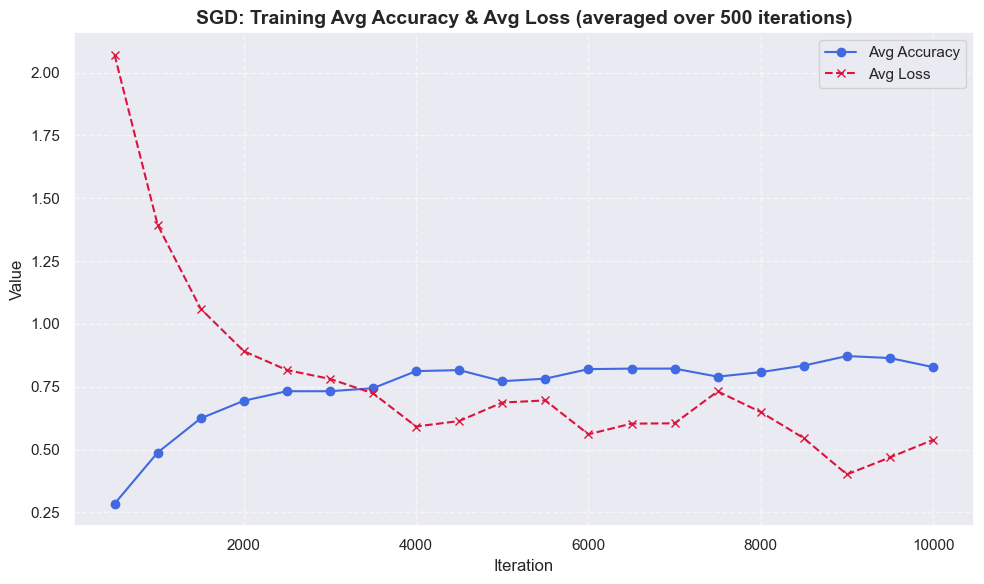

In [27]:
W1_sgd, b1_sgd, W2_sgd, b2_sgd = sgd(X_train, Y_train, alpha=0.01, iterations=10000) 

# Mini batch

In [ ]:
def one_hot_encode(Y, num_classes=10): #Same as sgd
    y_size = Y.size
    y_values = Y

    arr = np.zeros((y_size, num_classes))
    arr[np.arange(y_size), y_values] = 1
    arr = arr.T 
    return arr

In [ ]:
def get_accuracy(predictions, Y): #same
    accuracy = np.sum(predictions == Y) / Y.size
    return accuracy

In [ ]:
def back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    num_classes = 10 
    m = Y.size # BATCH SIZE
    
    one_hot_Y = one_hot_encode(Y, num_classes)
    dZ2 = A2 - one_hot_Y 
    
    dW2 = (1/m) * dZ2.dot(A1.T) 
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) 
    
    dZ1 = W2.T.dot(dZ2) * derivative_ReLu(Z1) 
    dW1 = (1/m) * dZ1.dot(X.T) 
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True) 
    log_probs = np.log(A2 + 1e-9) 
    loss = -np.sum(one_hot_Y * log_probs) / m 
    
    return dW1, db1, dW2, db2, loss

In [ ]:
def mini_batch_gradient_descent(X, Y, alpha, epochs, batch_size):
    W1, b1, W2, b2 = initialize_parameters()
    
    epoch_accuracy_list = []
    epoch_loss_list = []
    epoch_num_list = [] # Stores epoch numbers for plotting

    num_samples = X.shape[1]

    for epoch in range(epochs):
        # Shuffle training data at the beginning of each epoch
        permutation = np.random.permutation(num_samples)
        X_shuffled = X[:, permutation]
        Y_shuffled = Y[permutation]

        current_epoch_batch_losses = [] 

        for i in range(0, num_samples, batch_size):

            X_batch = X_shuffled[:, i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size] 

            Z1_batch, A1_batch, Z2_batch, A2_batch = forward_prop(W1, b1, W2, b2, X_batch)
                        
            dW1, db1, dW2, db2, batch_loss = back_propagation(Z1_batch, A1_batch, Z2_batch, A2_batch, W1, W2, X_batch, Y_batch)
            current_epoch_batch_losses.append(batch_loss)
            
            
            W1, b1, W2, b2 = update_para(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

       
        avg_epoch_loss = np.mean(current_epoch_batch_losses)
        
        
        _, _, _, A2_full_train = forward_prop(W1, b1, W2, b2, X) 
        predictions_full_train = get_predictions(A2_full_train)
        epoch_train_accuracy = get_accuracy(predictions_full_train, Y) 

        # Log progress (e.g., every 10 epochs or the last epoch)
        log_interval = 10
        if epoch % log_interval == 0 or epoch == epochs - 1:
            print(f"Epoch: {epoch}")
            print(f"  Training Accuracy: {epoch_train_accuracy:}")
            print(f"  Average Training Loss for Epoch: {avg_epoch_loss:}")

        epoch_accuracy_list.append(epoch_train_accuracy)
        epoch_loss_list.append(avg_epoch_loss)
        epoch_num_list.append(epoch)
            
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(epoch_num_list, epoch_accuracy_list, label='Training Accuracy per Epoch', color='royalblue', marker='o', linestyle='-')
    plt.plot(epoch_num_list, epoch_loss_list, label='Avg Training Loss per Epoch', color='crimson', marker='x', linestyle='--')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.title('Mini-Batch GD: Training Accuracy & Loss Over Epochs', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return W1, b1, W2, b2

In [ ]:

df = pd.read_csv('/Users/vedang/Downloads/train 2.csv')
df_array = np.array(df)
m_total_samples, n_features_plus_label = df_array.shape
np.random.shuffle(df_array)
df_train_transposed = df_array.T
Y_train_full = df_train_transposed[0]
X_train_full = df_train_transposed[1:]
X_train_full = X_train_full / 255.


batch_s = 64
num_epochs = 5
learning_r = 0.1 

W1_mb, b1_mb, W2_mb, b2_mb = mini_batch_gradient_descent(X_train_full, Y_train_full, alpha=learning_r, epochs=num_epochs, batch_size=batch_s)

Epoch: 0
  Training Accuracy: 0.8567
  Average Training Loss for Epoch: 0.8128
Epoch: 10
  Training Accuracy: 0.9256
  Average Training Loss for Epoch: 0.2473
